In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from IPython.display import Image

def display_images(image_path1, image_path2):
        # read images
        img_A = mpimg.imread(image_path1)
        img_B = mpimg.imread(image_path2)

        # pad top with white space
        larger = max(img_A.shape[0], img_B.shape[0])
        img_A = np.pad(img_A, ((larger - img_A.shape[0], 0), (0, 0), (0, 0)), mode='constant', constant_values=1)
        img_B = np.pad(img_B, ((larger - img_B.shape[0], 0), (0, 0), (0, 0)), mode='constant', constant_values=1)

        # stack
        img = np.concatenate((img_A, img_B), axis=1)
        # save tmp image
        tmp_path = 'tmp.png'
        plt.imsave(tmp_path, img)
        return Image(tmp_path, width=600)

### Basic Usage

Each model works by predicting a 2Mb contact map at any location. This 2Mb heatmap can then be further cropped to your region of interest. You need to provide the `--start` of the prediction window, and everything downstream 2Mb will be predicted. You can then specify the `--region` of interest to crop the 2Mb prediction, but be aware that this region must be contained within the prediction window.

You can run the `perturb.py` script without any perturbation arguments if you just want to make a prediction, but all perturbation examples will also save the original prediction so this is not usually necessary. 

You must pass the `--model` argument to specify the model checkpoint, the `--seq` argument to specify the location of the chromosome split FASTA files, and the `--bigwigs` argument to specify the location of the input bigwig tracks. These must be provided in the same order as the model was trained.

In [13]:
! uv pip install ../.[training] --no-deps

Using Python 3.12.10 environment at: /home/dmp131/anaconda3/envs/cshark
Resolved 1 package in 3ms                                            
   Building cshark @ file:///home/dmp131/C.Shark                       
   Building cshark @ file:///home/dmp131/C.Shark               
   Building cshark @ file:///home/dmp131/C.Shark               
   Building cshark @ file:///home/dmp131/C.Shark               
   Building cshark @ file:///home/dmp131/C.Shark               
      Built cshark @ file:///home/dmp131/C.Shark               
Prepared 1 package in 956ms                                              
Uninstalled 1 package in 1ms
Installed 1 package in 1ms file:///home/dmp131/C.Shark)     
 ~ cshark==0.0.1 (from file:///home/dmp131/C.Shark)


In [26]:
! python ../src/cshark/inference/perturb.py \
    --celltype hESC_WT_50pct \
    --outname baseline \
    --chr chr7 \
    --start 23000000 \
    --model /mnt/jinstore/JinLab02/dmp131/C.Shark/checkpoints/deeploop_hESC_CTCF_ATAC_1d_tracks.ckpt \
    --seq ../cshark_data/data/hg19/dna_sequence \
    --region chr7:23200000-23700000 \
    --min-val-pred 0.5 \
    --plot-bigwigs h3k27ac h3k4me3 \
    --plot-pred-bigwigs atac rad21 h3k27ac h3k4me3 \
    --bigwigs ctcf=../cshark_data/data/hg19/hESC_WT_50pct/genomic_features/ctcf.bw \
              atac=../cshark_data/data/hg19/hESC_WT_50pct/genomic_features/atac.bw



INFO:pygenometracks.tracksClass:initialize 1. [x-axis]
INFO:pygenometracks.tracksClass:initialize 2. [ctcf]
INFO:pygenometracks.tracksClass:initialize 3. [atac]
INFO:pygenometracks.tracksClass:initialize 4. [h3k27ac]
INFO:pygenometracks.tracksClass:initialize 5. [h3k4me3]
INFO:pygenometracks.tracksClass:initialize 6. [deeploop]

INFO:pygenometracks.tracksClass:initialize 7. [Genes]
100%|█████████████████████████████████████████| 26/26 [00:00<00:00, 1149.06it/s]
INFO:pygenometracks.tracksClass:initialize 8. [arcs]
100%|██████████████████████████████████████| 134/134 [00:00<00:00, 98052.47it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:1.6710400581359863
DEBUG:pygenometracks.tracksClass:Figure size in cm is 22.576367119470568 x 36.037234042553195. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [x-axis]
INFO:pygenometracks.tracksClass:plotting 2. [ctcf]
INFO:pygenometracks.tracksClass:plotting 3. [atac]
INFO:pygenometracks

Here we compare the experimental data to the prediction:

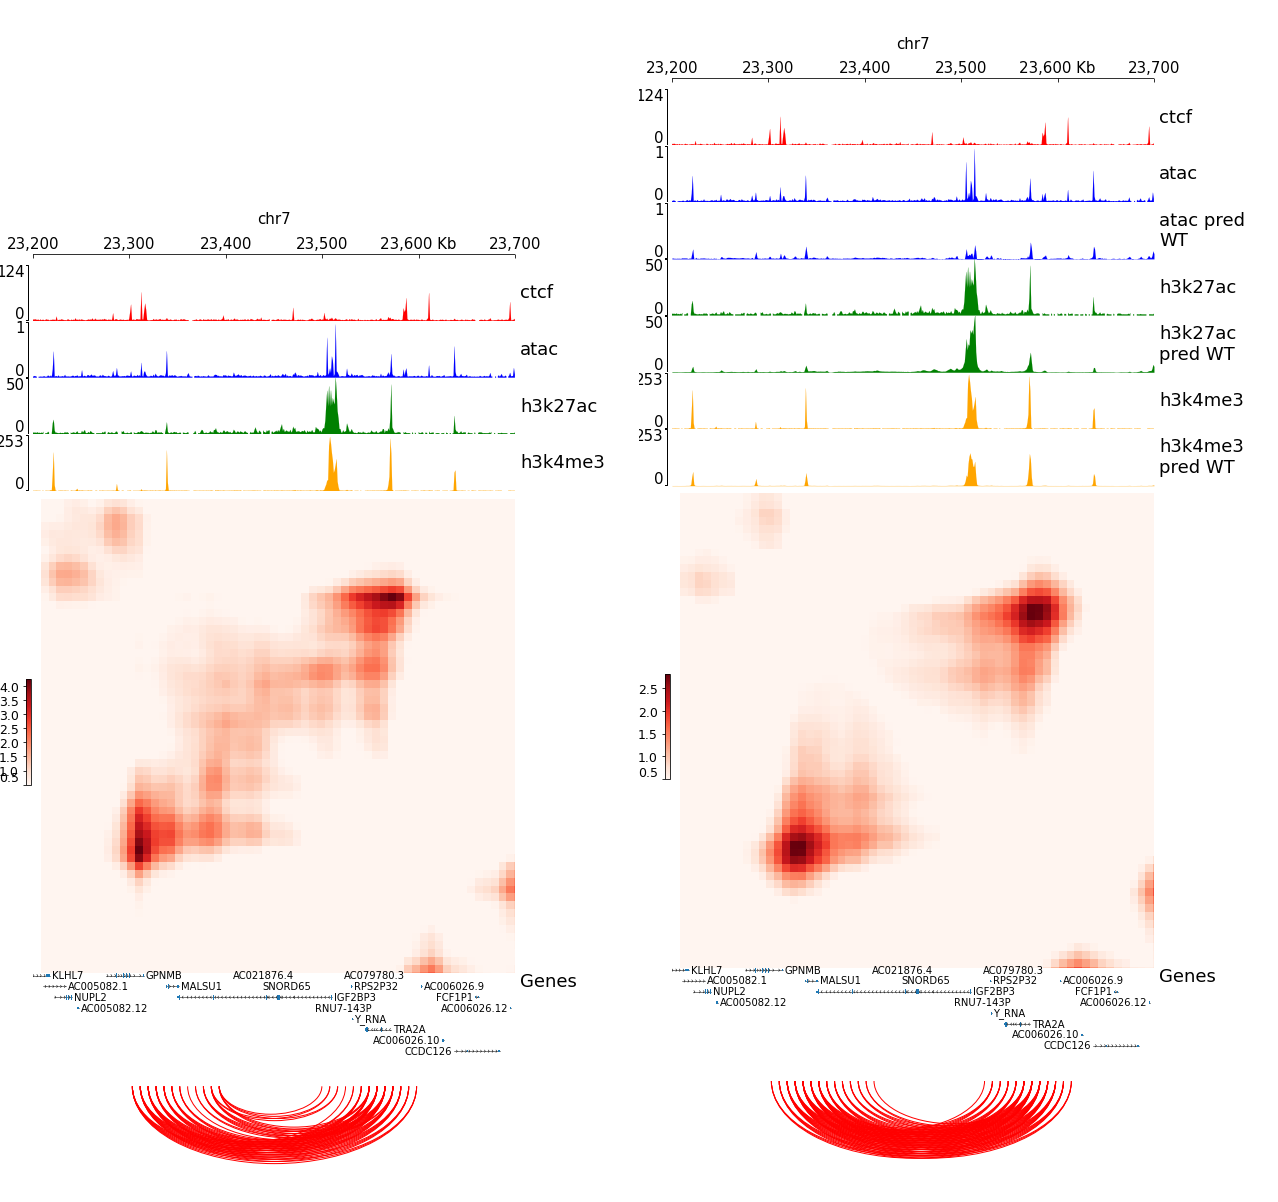

In [27]:
display_images('outputs/baseline_hESC_WT_50pct_chr7_23000000_ctcf_true_tracks.png', 
               'outputs/baseline_hESC_WT_50pct_chr7_23000000_ctcf_pred_tracks.png')

### CTCF Knockout

You can perform CTCF knockout by specifying the `--ko-start` and `--ko-width` arguments. This can accept a list of starts and width to knockout multiple sites or you can set `--ko-start` to the `--start` value and `--ko-width` to 2Mb to knockout the entire region.

There are several "knockout modes" we implement. We recommend using the default `--ko-mode knockout` which detects peaks and sets their value to the background.

In [49]:
! python ../src/cshark/inference/perturb.py \
    --celltype hESC_WT_50pct \
    --outname ctcf_ko_only \
    --chr chr3 \
    --start 27274853 \
    --model /mnt/jinstore/JinLab02/dmp131/C.Shark/checkpoints/deeploop_hESC_CTCF_ATAC_1d_tracks.ckpt \
    --seq ../cshark_data/data/hg19/dna_sequence \
    --region chr3:27274853-28457152 \
    --ko-start 27351179 27699356 \
    --ko-width 50000 25000  \
    --ko ctcf \
    --ko-mode knockout \
    --min-val-pred 0.5 \
    --plot-bigwigs rad21 h3k27ac h3k4me3 \
    --plot-pred-bigwigs atac rad21 h3k27ac h3k4me3 \
    --bigwigs ctcf=../cshark_data/data/hg19/hESC_WT_50pct/genomic_features/ctcf.bw \
              atac=../cshark_data/data/hg19/hESC_WT_50pct/genomic_features/atac.bw

/home/dmp131/C.Shark/examples/../src/cshark/inference/perturb.py:407: RuntimeWarning: invalid value encountered in log2
  ctcf_log2fc = np.log2((ctcf_pred + 1e-5) / (ctcf_pred_before + 1e-5))


INFO:pygenometracks.tracksClass:initialize 1. [x-axis]
INFO:pygenometracks.tracksClass:initialize 2. [ctcf]
INFO:pygenometracks.tracksClass:initialize 3. [atac]
INFO:pygenometracks.tracksClass:initialize 4. [rad21]
INFO:pygenometracks.tracksClass:initialize 5. [h3k27ac]
INFO:pygenometracks.tracksClass:initialize 6. [h3k4me3]
INFO:pygenometracks.tracksClass:initialize 7. [deeploop]
INFO:pygenometracks.tracksClass:initialize 8. [Genes]
100%|██████████████████████████████████████████| 25/25 [00:00<00:00, 925.39it/s]
INFO:pygenometracks.tracksClass:initialize 9. [arcs]
100%|██████████████████████████████████████| 896/896 [00:00<00:00, 80094.12it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:1.8212764263153076
DEBUG:pygenometracks.tracksClass:Figure si

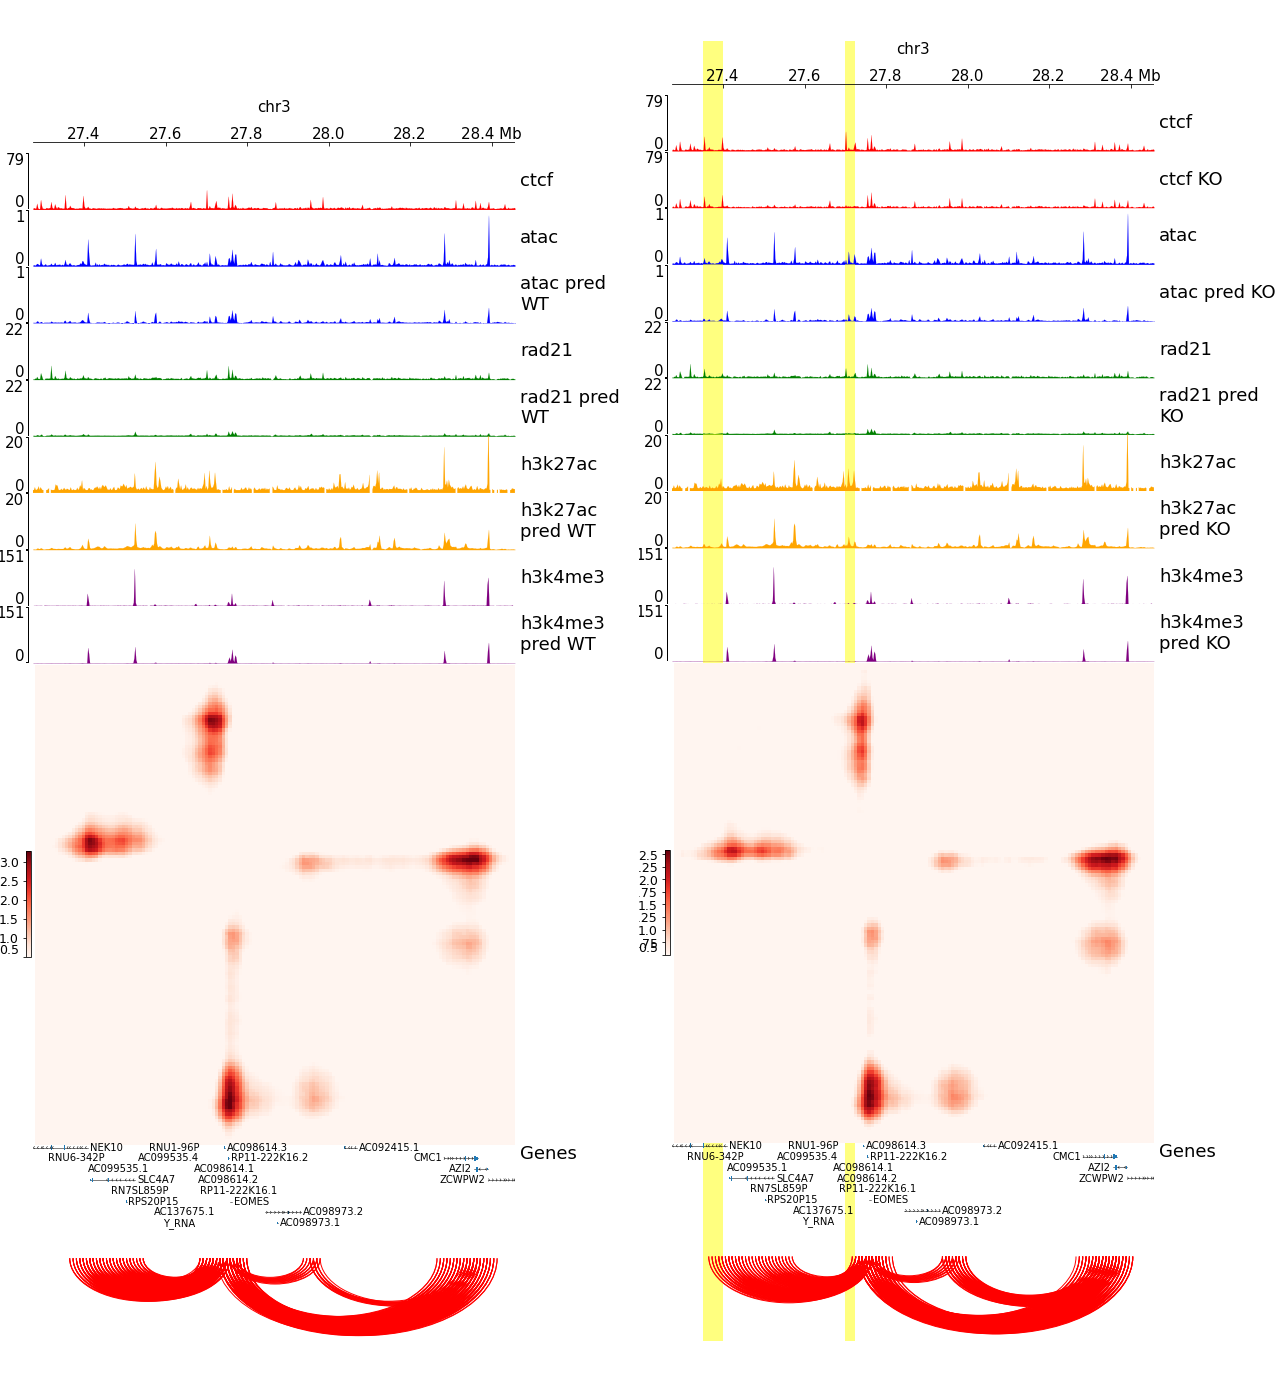

In [50]:
display_images('outputs/ctcf_ko_only_hESC_WT_50pct_chr3_27274853_ctcf_pred_tracks.png', 
               'outputs/ctcf_ko_only_hESC_WT_50pct_chr3_27274853_ctcf_ko_tracks.png')

In [24]:
! python ../src/cshark/inference/perturb.py \
    --celltype hESC_WT_50pct \
    --outname ctcf_ko_only \
    --chr chr7 \
    --start 23000000 \
    --model /mnt/jinstore/JinLab02/dmp131/C.Shark/checkpoints/deeploop_hESC_CTCF_ATAC_1d_tracks.ckpt \
    --seq ../cshark_data/data/hg19/dna_sequence \
    --region chr7:23200000-23700000 \
    --ko-start 23580000 \
    --ko-width 10000 \
    --ko ctcf \
    --ko-mode knockout \
    --min-val-pred 0.5 \
    --plot-bigwigs rad21 h3k27ac h3k4me3 \
    --plot-pred-bigwigs atac rad21 h3k27ac h3k4me3 \
    --bigwigs ctcf=../cshark_data/data/hg19/hESC_WT_50pct/genomic_features/ctcf.bw \
              atac=../cshark_data/data/hg19/hESC_WT_50pct/genomic_features/atac.bw

/home/dmp131/C.Shark/examples/../src/cshark/inference/perturb.py:402: RuntimeWarning: invalid value encountered in log2
  ctcf_log2fc = np.log2((ctcf_pred + 1e-5) / (ctcf_pred_before + 1e-5))


INFO:pygenometracks.tracksClass:initialize 1. [x-axis]
INFO:pygenometracks.tracksClass:initialize 2. [ctcf]
INFO:pygenometracks.tracksClass:initialize 3. [atac]
INFO:pygenometracks.tracksClass:initialize 4. [rad21]
INFO:pygenometracks.tracksClass:initialize 5. [h3k27ac]
INFO:pygenometracks.tracksClass:initialize 6. [h3k4me3]
INFO:pygenometracks.tracksClass:initialize 7. [deeploop]

INFO:pygenometracks.tracksClass:initialize 8. [Genes]
100%|█████████████████████████████████████████| 26/26 [00:00<00:00, 1072.42it/s]
INFO:pygenometracks.tracksClass:initialize 9. [arcs]
100%|██████████████████████████████████████| 134/134 [00:00<00:00, 88789.37it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:1.5792946815490723
DEBUG:pygenometracks.tracksClass:Figure s

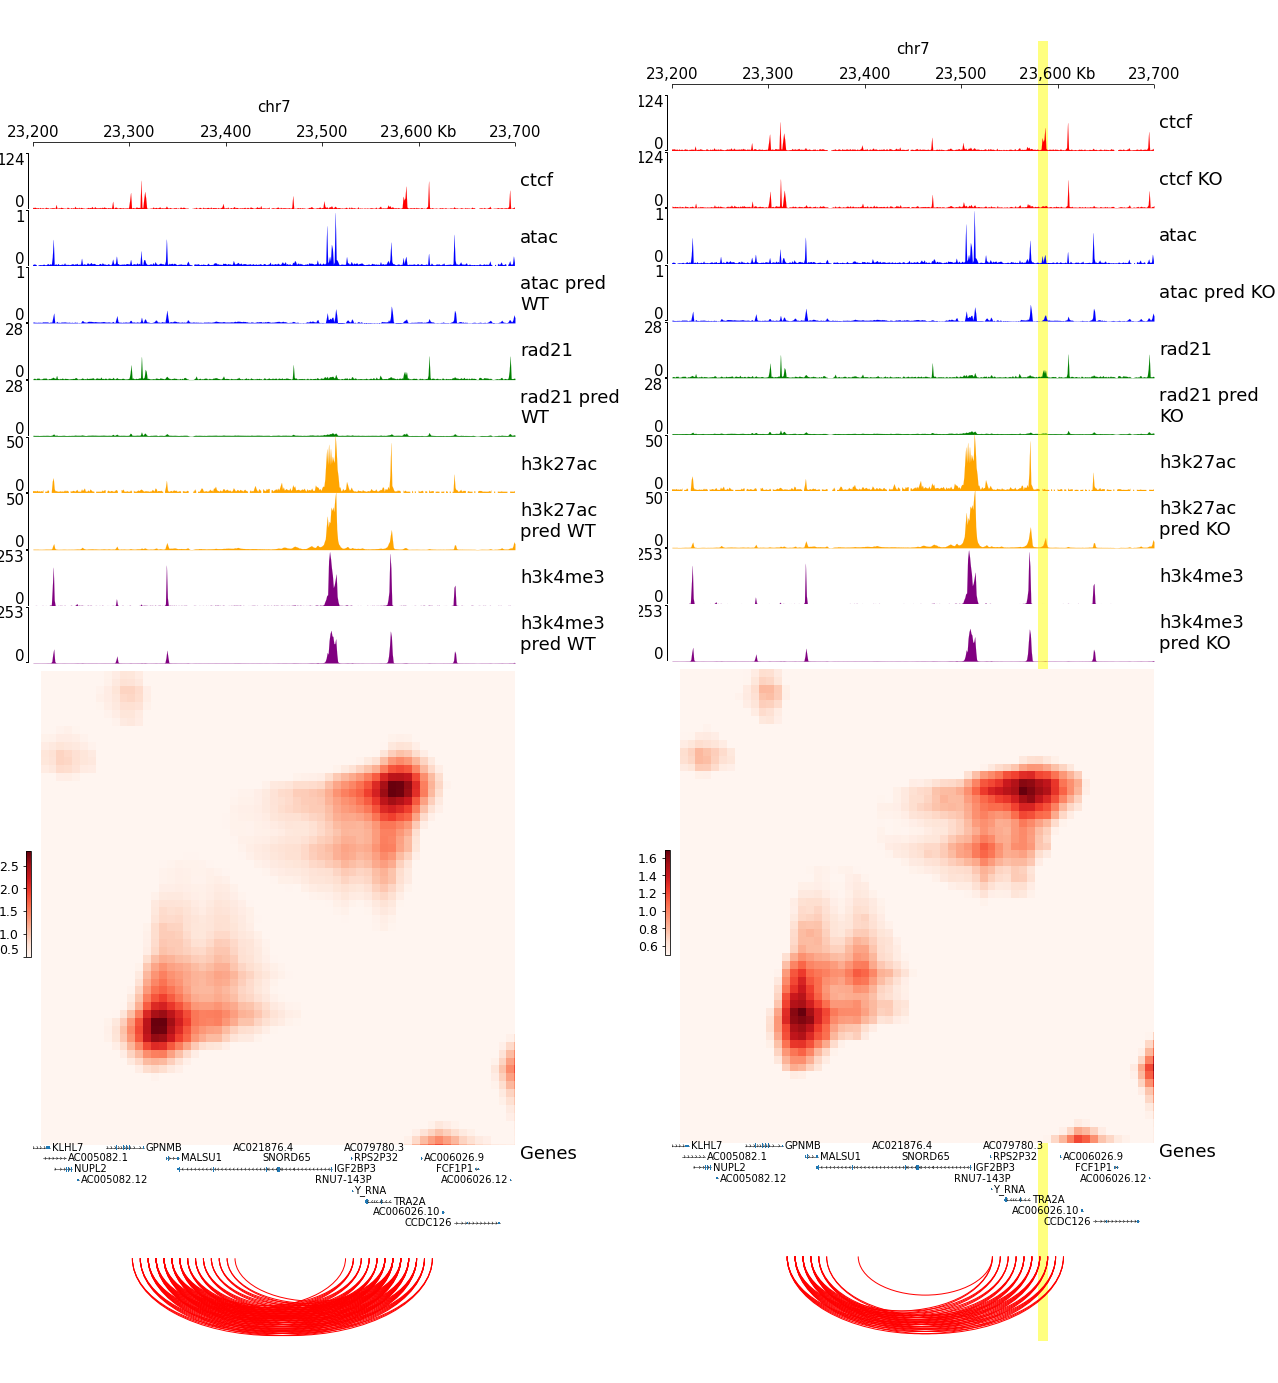

In [25]:
display_images('outputs/ctcf_ko_only_hESC_WT_50pct_chr7_23000000_ctcf_pred_tracks.png', 
               'outputs/ctcf_ko_only_hESC_WT_50pct_chr7_23000000_ctcf_ko_tracks.png')

You can also provide the `--plot-diff` flag with `--min-val-diff` and `--max-val-diff` to plot the difference between WT and KO predictions. This will also save the ground truth, WT, and KO predictions as before.


In [28]:
! python ../src/cshark/inference/perturb.py \
    --celltype hESC_WT_50pct \
    --outname ctcf_ko \
    --chr chr7 \
    --start 23000000 \
    --model /mnt/jinstore/JinLab02/dmp131/C.Shark/checkpoints/deeploop_hESC_CTCF_ATAC_1d_tracks.ckpt \
    --seq ../cshark_data/data/hg19/dna_sequence \
    --region chr7:23200000-23700000 \
    --ko-start 23580000 \
    --ko-width 10000 \
    --ko ctcf \
    --ko-mode knockout \
    --plot-diff \
    --min-val-pred 0.5 \
    --min-val-diff -0.5 \
    --max-val-diff 0.5 \
    --plot-bigwigs rad21 h3k27ac h3k4me3 \
    --plot-pred-bigwigs atac rad21 h3k27ac h3k4me3 \
    --bigwigs ctcf=../cshark_data/data/hg19/hESC_WT_50pct/genomic_features/ctcf.bw \
              atac=../cshark_data/data/hg19/hESC_WT_50pct/genomic_features/atac.bw

/home/dmp131/C.Shark/examples/../src/cshark/inference/perturb.py:402: RuntimeWarning: invalid value encountered in log2
  ctcf_log2fc = np.log2((ctcf_pred + 1e-5) / (ctcf_pred_before + 1e-5))


INFO:pygenometracks.tracksClass:initialize 1. [x-axis]
INFO:pygenometracks.tracksClass:initialize 2. [ctcf]
INFO:pygenometracks.tracksClass:initialize 3. [ctcf KO]
INFO:pygenometracks.tracksClass:initialize 4. [atac]
INFO:pygenometracks.tracksClass:initialize 5. [rad21]
INFO:pygenometracks.tracksClass:initialize 6. [h3k27ac]
INFO:pygenometracks.tracksClass:initialize 7. [h3k4me3]
INFO:pygenometracks.tracksClass:initialize 8. [Diff]

INFO:pygenometracks.tracksClass:initialize 9. [Genes]
100%|█████████████████████████████████████████| 26/26 [00:00<00:00, 1173.38it/s]
INFO:pygenometracks.tracksClass:initialize 10. [arcs]
100%|██████████████████████████████████████| 300/300 [00:00<00:00, 61635.62it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:3.76691

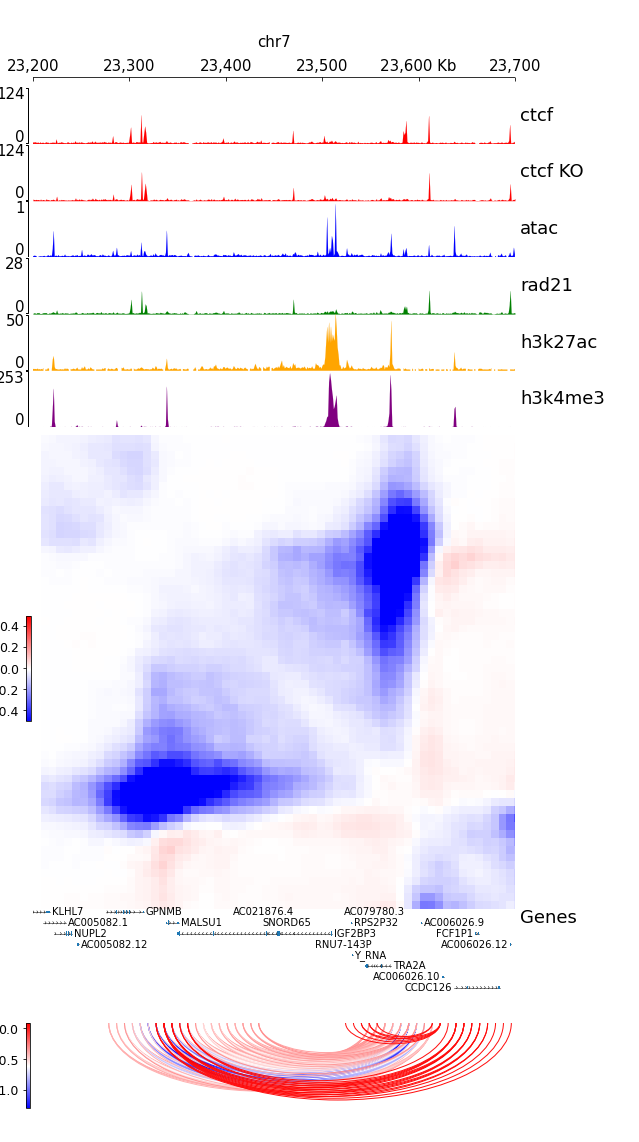

In [29]:
Image(filename='outputs/ctcf_ko_hESC_WT_50pct_chr7_23000000_ctcf_ko_tracks_diff.png', width=300)

### Sequence Perturbation

The `perturb.py` script can also be used to perturb the sequence of the input FASTA files. This is done by specifying the `--var-pos` and `--alt` arguments with lists of SNP positions and the corresponding alt base. Currently, the differences seem very small and difficult to find any statistically significant differences. We recommend using the `--plot-diff` flag with `--min-val-diff` and `--max-val-diff` set to values very close to 0.

In [40]:
! python ../src/cshark/inference/perturb.py \
    --celltype hESC_WT_50pct \
    --outname snp \
    --chr chr7 \
    --start 23000000 \
    --model /mnt/jinstore/JinLab02/dmp131/C.Shark/checkpoints/deeploop_hESC_CTCF_ATAC_1d_tracks.ckpt \
    --seq ../cshark_data/data/hg19/dna_sequence \
    --region chr7:23200000-23700000 \
    --var-pos 23584702 \
    --alt T \
    --plot-diff \
    --min-val-diff -0.001 \
    --max-val-diff 0.001 \
    --plot-bigwigs rad21 h3k27ac h3k4me3 \
    --plot-pred-bigwigs ctcf atac rad21 h3k27ac h3k4me3 \
    --bigwigs ctcf=../cshark_data/data/hg19/hESC_WT_50pct/genomic_features/ctcf.bw \
              atac=../cshark_data/data/hg19/hESC_WT_50pct/genomic_features/atac.bw

Variant pos: 23584702, alt base: T
Pos: 584701, Alt: T, Ref: C
CTACTGACAT*C*TAGTGGGTA


INFO:pygenometracks.tracksClass:initialize 1. [x-axis]
INFO:pygenometracks.tracksClass:initialize 2. [ctcf]
INFO:pygenometracks.tracksClass:initialize 3. [ctcf pred]
INFO:pygenometracks.tracksClass:initialize 4. [atac]
INFO:pygenometracks.tracksClass:initialize 5. [atac pred]
INFO:pygenometracks.tracksClass:initialize 6. [rad21]
INFO:pygenometracks.tracksClass:initialize 7. [rad21 pred]
INFO:pygenometracks.tracksClass:initialize 8. [h3k27ac]
INFO:pygenometracks.tracksClass:initialize 9. [h3k27ac pred]
INFO:pygenometracks.tracksClass:initialize 10. [h3k4me3]
INFO:pygenometracks.tracksClass:initialize 11. [h3k4me3 pred]
INFO:pygenometracks.tracksClass:initialize 12. [Diff]

INFO:pygenometracks.tracksClass:initialize 13. [Genes]
100%|██████████████████████████████████████████| 26/26 [00:00<00:00, 994.55it/s]
INFO:pygenometracks.tracksClass:initialize 14. [arcs]
100%|████████████████████████████████████

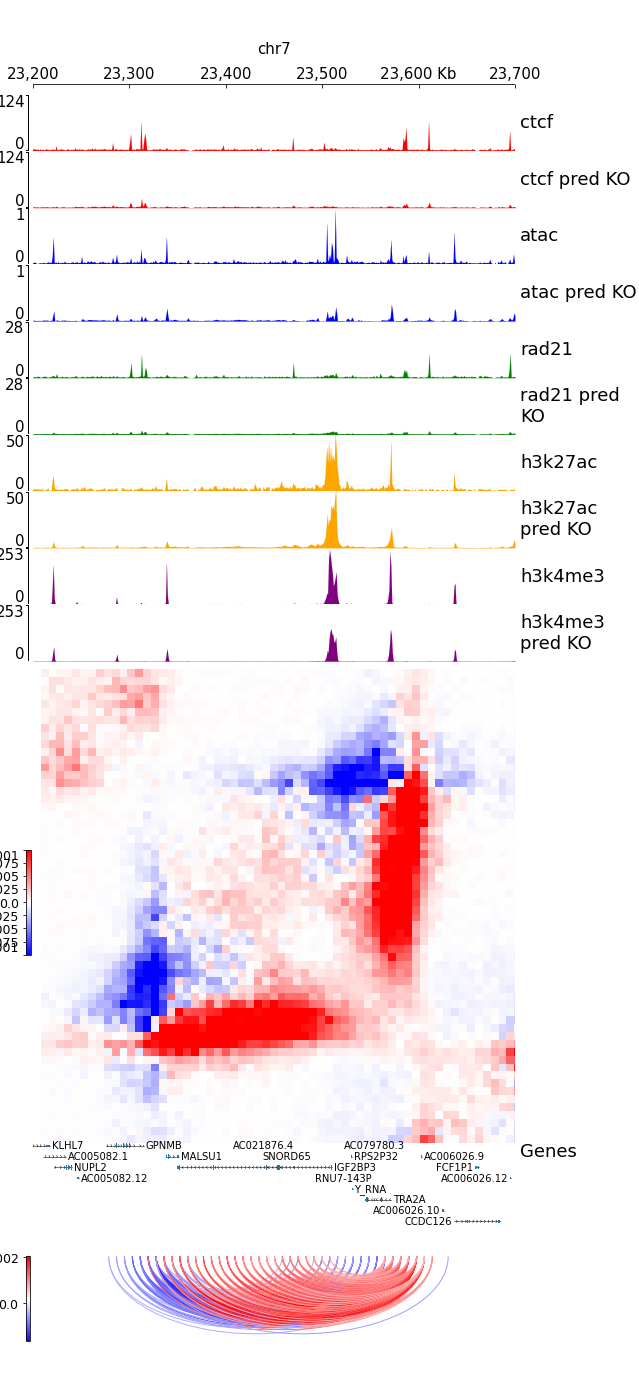

In [41]:
Image(filename='outputs/snp_hESC_WT_50pct_chr7_23000000_ctcf_ko_tracks_diff.png', width=300)

### Combined Perturbations

You can also combine the CTCF knockout and sequence perturbation by providing both sets of arguments. This will knockout the CTCF sites and perturb the sequence.

In [ ]:
! python ../src/cshark/inference/perturb.py \
    --celltype hESC_WT_50pct \
    --outname ctcf_ko \
    --chr chr7 \
    --start 23000000 \
    --model ../checkpoints/deeploop_hESC_EP_CTCF_fix.ckpt \
    --seq ../cshark_data/data/hg19/dna_sequence \
    --region chr7:23200000-23700000 \
    --ko-start 23580000 \
    --ko-width 10000 \
    --ko ctcf \
    --ko-mode knockout \
    --var-pos 23584702 \
    --alt T \
    --plot-diff \
    --min-val-pred 0.5 \
    --min-val-diff -0.5 \
    --max-val-diff 0.5 \
    --bigwigs ctcf=../cshark_data/data/hg19/hESC_WT_50pct/genomic_features/ctcf.bw \
              h3k27ac=../cshark_data/data/hg19/hESC_WT_50pct/genomic_features/h3k27ac.bw \
              h3k4me3=../cshark_data/data/hg19/hESC_WT_50pct/genomic_features/h3k4me3.bw

In [ ]:
Image(filename='outputs/ctcf_ko_hESC_WT_50pct_chr7_23000000_ctcf_ko_tracks_diff.png', width=300)

### CTCF + RAD21 Knockout

You can also perform combined knockout of any of the input bigwig tracks by specifying multiple tracks in the `--ko` argument. Here we run `--ko ctcf rad21` which will knockout both CTCF and RAD21 peaks at our specified `--ko-start` and `--ko-width`. We then compare this to only knockout of CTCF or RAD21.

Note that this is using a different model which takes RAD21 as input so we must specify a new model checkpoint with `--model` and specify the RAD21 bigwig track in `--bigwigs`. We also perform full 2Mb knockout instead of a single peak knockout.

In [ ]:
! python ../src/cshark/inference/perturb.py \
    --celltype hESC_WT_50pct \
    --outname ctcf_rad21_ko \
    --chr chr7 \
    --start 23000000 \
    --model ../checkpoints/deeploop_hESC_EP_CTCF_RAD21.ckpt \
    --seq ../cshark_data/data/hg19/dna_sequence \
    --region chr7:23200000-23700000 \
    --ko-start 23000000 \
    --ko-width 2000000 \
    --ko ctcf rad21 \
    --ko-mode knockout \
    --plot-diff \
    --min-val-pred 0.2 \
    --max-val-pred 2.5 \
    --min-val-diff -1.0 \
    --max-val-diff 1.0 \
    --bigwigs ctcf=../cshark_data/data/hg19/hESC_WT_50pct/genomic_features/ctcf.bw \
              rad21=../cshark_data/data/hg19/hESC_WT_50pct/genomic_features/rad21.bw \
              h3k27ac=../cshark_data/data/hg19/hESC_WT_50pct/genomic_features/h3k27ac.bw \
              h3k4me3=../cshark_data/data/hg19/hESC_WT_50pct/genomic_features/h3k4me3.bw

In [ ]:
display_images('outputs/ctcf_rad21_ko_hESC_WT_50pct_chr7_23000000_ctcf_pred_tracks.png', 
               'outputs/ctcf_rad21_ko_hESC_WT_50pct_chr7_23000000_ctcf_ko_tracks.png')

In [ ]:
Image(filename='outputs/ctcf_rad21_ko_hESC_WT_50pct_chr7_23000000_ctcf_ko_tracks_diff.png', width=300)

In [ ]:
! python ../src/cshark/inference/perturb.py \
    --celltype hESC_WT_50pct \
    --outname ctcf_ko \
    --chr chr7 \
    --start 23000000 \
    --model ../checkpoints/deeploop_hESC_EP_CTCF_RAD21.ckpt \
    --seq ../cshark_data/data/hg19/dna_sequence \
    --region chr7:23200000-23700000 \
    --ko-start 23000000 \
    --ko-width 2000000 \
    --ko ctcf \
    --ko-mode knockout \
    --plot-diff \
    --min-val-pred 0.5 \
    --min-val-diff -1.0 \
    --max-val-diff 1.0 \
    --bigwigs ctcf=../cshark_data/data/hg19/hESC_WT_50pct/genomic_features/ctcf.bw \
              rad21=../cshark_data/data/hg19/hESC_WT_50pct/genomic_features/rad21.bw \
              h3k27ac=../cshark_data/data/hg19/hESC_WT_50pct/genomic_features/h3k27ac.bw \
              h3k4me3=../cshark_data/data/hg19/hESC_WT_50pct/genomic_features/h3k4me3.bw

In [ ]:
Image(filename='outputs/ctcf_ko_hESC_WT_50pct_chr7_23000000_ctcf_ko_tracks_diff.png', width=300)

In [ ]:
! python ../src/cshark/inference/perturb.py \
    --celltype hESC_WT_50pct \
    --outname rad21_ko \
    --chr chr7 \
    --start 23000000 \
    --model ../checkpoints/deeploop_hESC_EP_CTCF_RAD21.ckpt \
    --seq ../cshark_data/data/hg19/dna_sequence \
    --region chr7:23200000-23700000 \
    --ko-start 23000000 \
    --ko-width 2000000 \
    --ko rad21 \
    --ko-mode knockout \
    --plot-diff \
    --min-val-pred 0.5 \
    --min-val-diff -1.0 \
    --max-val-diff 1.0 \
    --bigwigs ctcf=../cshark_data/data/hg19/hESC_WT_50pct/genomic_features/ctcf.bw \
              rad21=../cshark_data/data/hg19/hESC_WT_50pct/genomic_features/rad21.bw \
              h3k27ac=../cshark_data/data/hg19/hESC_WT_50pct/genomic_features/h3k27ac.bw \
              h3k4me3=../cshark_data/data/hg19/hESC_WT_50pct/genomic_features/h3k4me3.bw

In [ ]:
display_images('outputs/ctcf_ko_hESC_WT_50pct_chr7_23000000_ctcf_ko_tracks_diff.png',
               'outputs/rad21_ko_hESC_WT_50pct_chr7_23000000_ctcf_ko_tracks_diff.png')